## EDA Dataset sobre las tendencias (Gaming)

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv("../../data/raw/Gaming-Trends-2024.csv", delimiter=',',encoding='unicode_escape')
df.head(3)

,Date,Platform,Daily Active Users (DAU),New Registrations,Session Duration (minutes),In-game Purchases ($),Social Media Mentions,Stream Viewership,Revenue ($),Top Genre,Influencer Endorsements
0,2022-04-13,PC,142204,14220,31.266635,60772.724060,7116,85079.542766,87378.407590,Action,0
1,2021-03-17,PC,132314,13231,23.314436,43499.834450,6582,64188.420576,41132.113751,Action,0
2,2019-03-09,VR,111557,11155,33.859334,52178.791314,5572,34385.665788,71787.342041,Simulation,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        4989 non-null   object 
 1   Platform                    4989 non-null   object 
 2   Daily Active Users (DAU)    4989 non-null   int64  
 3   New Registrations           4989 non-null   int64  
 4   Session Duration (minutes)  4989 non-null   float64
 5   In-game Purchases ($)       4989 non-null   float64
 6   Social Media Mentions       4989 non-null   int64  
 7   Stream Viewership           4989 non-null   float64
 8   Revenue ($)                 4989 non-null   float64
 9   Top Genre                   4989 non-null   object 
 10  Influencer Endorsements     4989 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 428.9+ KB


# Limpieza preliminar

In [73]:
# Corregir tipos
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.astype({col: 'string' for col in df.select_dtypes(include=['object']).columns})

# Verificar el cambio
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        4989 non-null   datetime64[ns]
 1   Platform                    4989 non-null   string        
 2   Daily Active Users (DAU)    4989 non-null   int64         
 3   New Registrations           4989 non-null   int64         
 4   Session Duration (minutes)  4989 non-null   float64       
 5   In-game Purchases ($)       4989 non-null   float64       
 6   Social Media Mentions       4989 non-null   int64         
 7   Stream Viewership           4989 non-null   float64       
 8   Revenue ($)                 4989 non-null   float64       
 9   Top Genre                   4989 non-null   string        
 10  Influencer Endorsements     4989 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(4), string(2)
me

### Columnas numercias (Boxplot)

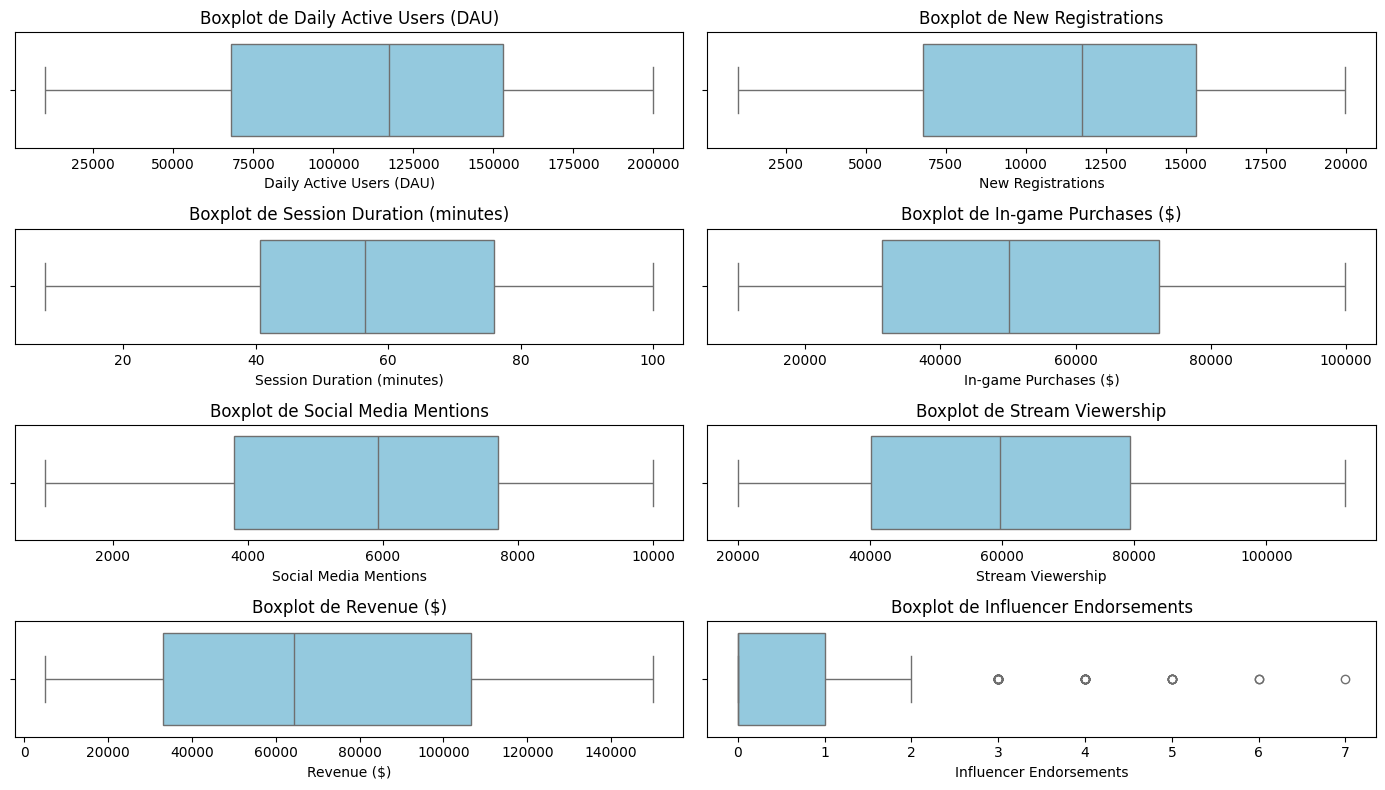

In [74]:
numeric_columns = df.select_dtypes(include=['float', 'int'])

columns_to_plot = ['Daily Active Users (DAU)', 'New Registrations', 'Session Duration (minutes)', 
    'In-game Purchases ($)', 'Social Media Mentions', 'Stream Viewership',
    'Revenue ($)', 'Influencer Endorsements']

# Crear subplots con dos gráficos por fila
fig, axes = plt.subplots(nrows=(len(columns_to_plot) + 1) // 2, ncols=2, figsize=(14, 8))  # Ajustar tamaño general

# Aplanar los ejes en caso de múltiples filas
axes = axes.flatten()

# Iterar sobre las columnas y sus posiciones en los ejes
for i, col in enumerate(columns_to_plot):
    if col in numeric_columns:  # Asegúrate de que la columna está en las numéricas
        sns.boxplot(data=numeric_columns, x=col, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Boxplot de {col}', fontsize=12)
        axes[i].set_xlabel(col, fontsize=10)
    else:
        axes[i].set_visible(False)  # Oculta los ejes no usados si la columna no es válida

# Ocultar ejes extra si no hay suficientes columnas para completar la cuadrícula
for j in range(len(columns_to_plot), len(axes)):
    axes[j].set_visible(False)

# Ajustar espacio entre gráficos
plt.tight_layout()

# Mostrar las gráficas
plt.show()


Para el caso de Influencer Endorsements no considero que los valores fuera de la boxplot necesiten limpieza (Dependiendo de fechas,eventos,etc muchos/pocos influencers pueden mostrar apoyo a distintos juegos)

## Correlaciones (Matriz de corr)

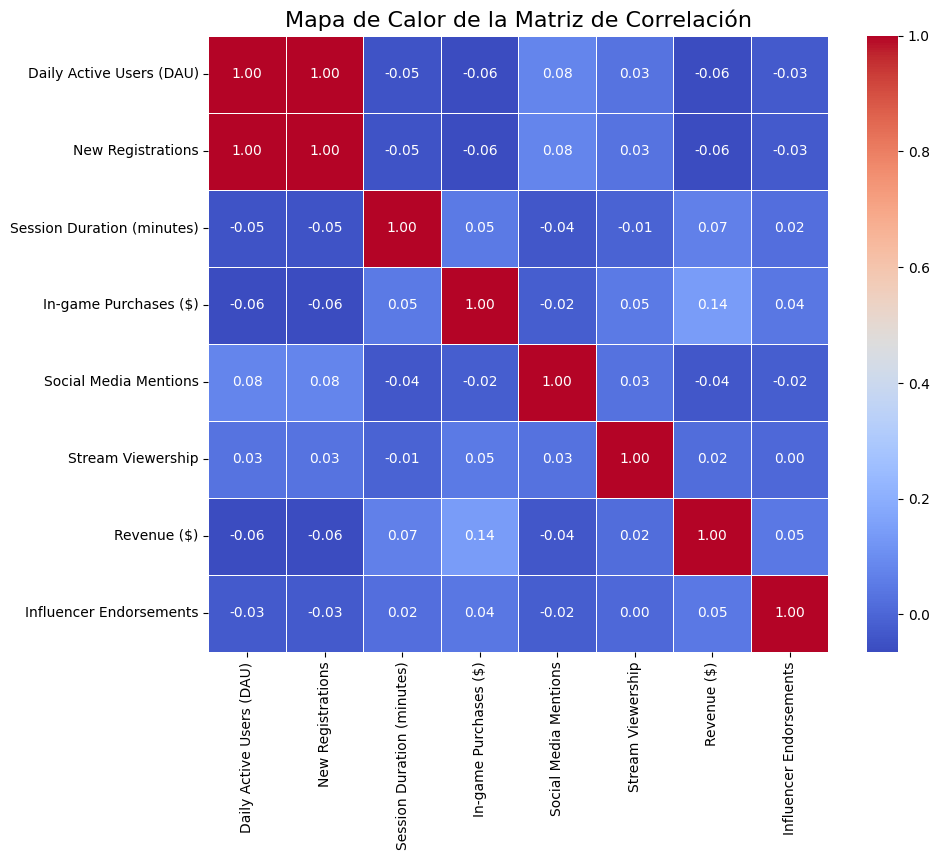

In [75]:
######## SOLO PARA LAS COLUMNAS NUMERICAS #############

# Crear una matriz de correlación solo con las columnas numéricas
correlation_matrix = numeric_columns.corr()

# Tamaño del gráfico
plt.figure(figsize=(10, 8))

# Creamos el mapa de calor
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Mapa de Calor de la Matriz de Correlación", fontsize=16)

plt.show()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        4989 non-null   datetime64[ns]
 1   Platform                    4989 non-null   string        
 2   Daily Active Users (DAU)    4989 non-null   int64         
 3   New Registrations           4989 non-null   int64         
 4   Session Duration (minutes)  4989 non-null   float64       
 5   In-game Purchases ($)       4989 non-null   float64       
 6   Social Media Mentions       4989 non-null   int64         
 7   Stream Viewership           4989 non-null   float64       
 8   Revenue ($)                 4989 non-null   float64       
 9   Top Genre                   4989 non-null   string        
 10  Influencer Endorsements     4989 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(4), string(2)
me

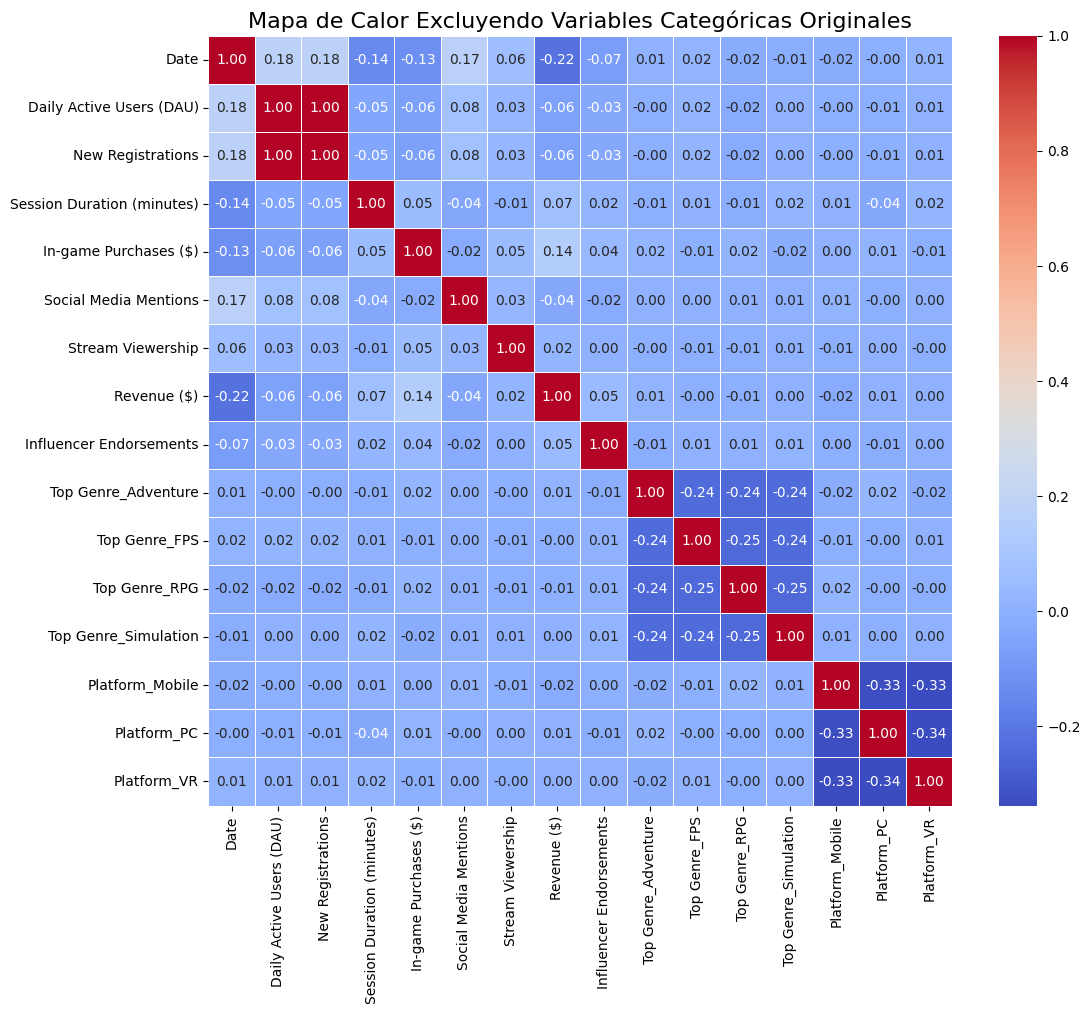

In [77]:
######### CON DUMMIES #################

# Columnas para generar dummies
columnas_categoricas = ['Top Genre', 'Platform']

# Generar dummies
for columna in columnas_categoricas:
    dummies = pd.get_dummies(df[columna], prefix=columna, drop_first=True)
    df = pd.concat([df, dummies], axis=1)

# Excluir las columnas string originales y cualquier otra columna que se quiera excluir
columnas_a_excluir = columnas_categoricas   # En caso de no querer la fecha puedes poner al final "+ ['Date']" (Sin comillas)
df_corr = df.drop(columns=columnas_a_excluir)

# Asegurar que solo queden columnas con los tipos deseados para la matriz de correlación, si quieres quitar Date también por aqui puedes quitar datetime64[ns]
df_corr = df.select_dtypes(include=['float64', 'int64', 'bool','datetime64[ns]']) 

# Calcular la matriz de correlación
correlation_matrix = df_corr.corr()

# Generar el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Mapa de Calor Excluyendo Variables Categóricas Originales", fontsize=16)

# Mostrar el gráfico
plt.show()

In [78]:
#Verificar como queda el df después de todo esto
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        4989 non-null   datetime64[ns]
 1   Platform                    4989 non-null   string        
 2   Daily Active Users (DAU)    4989 non-null   int64         
 3   New Registrations           4989 non-null   int64         
 4   Session Duration (minutes)  4989 non-null   float64       
 5   In-game Purchases ($)       4989 non-null   float64       
 6   Social Media Mentions       4989 non-null   int64         
 7   Stream Viewership           4989 non-null   float64       
 8   Revenue ($)                 4989 non-null   float64       
 9   Top Genre                   4989 non-null   string        
 10  Influencer Endorsements     4989 non-null   int64         
 11  Top Genre_Adventure         4989 non-null   boolean     

#### Analisis de columnas con respecto al tiempo

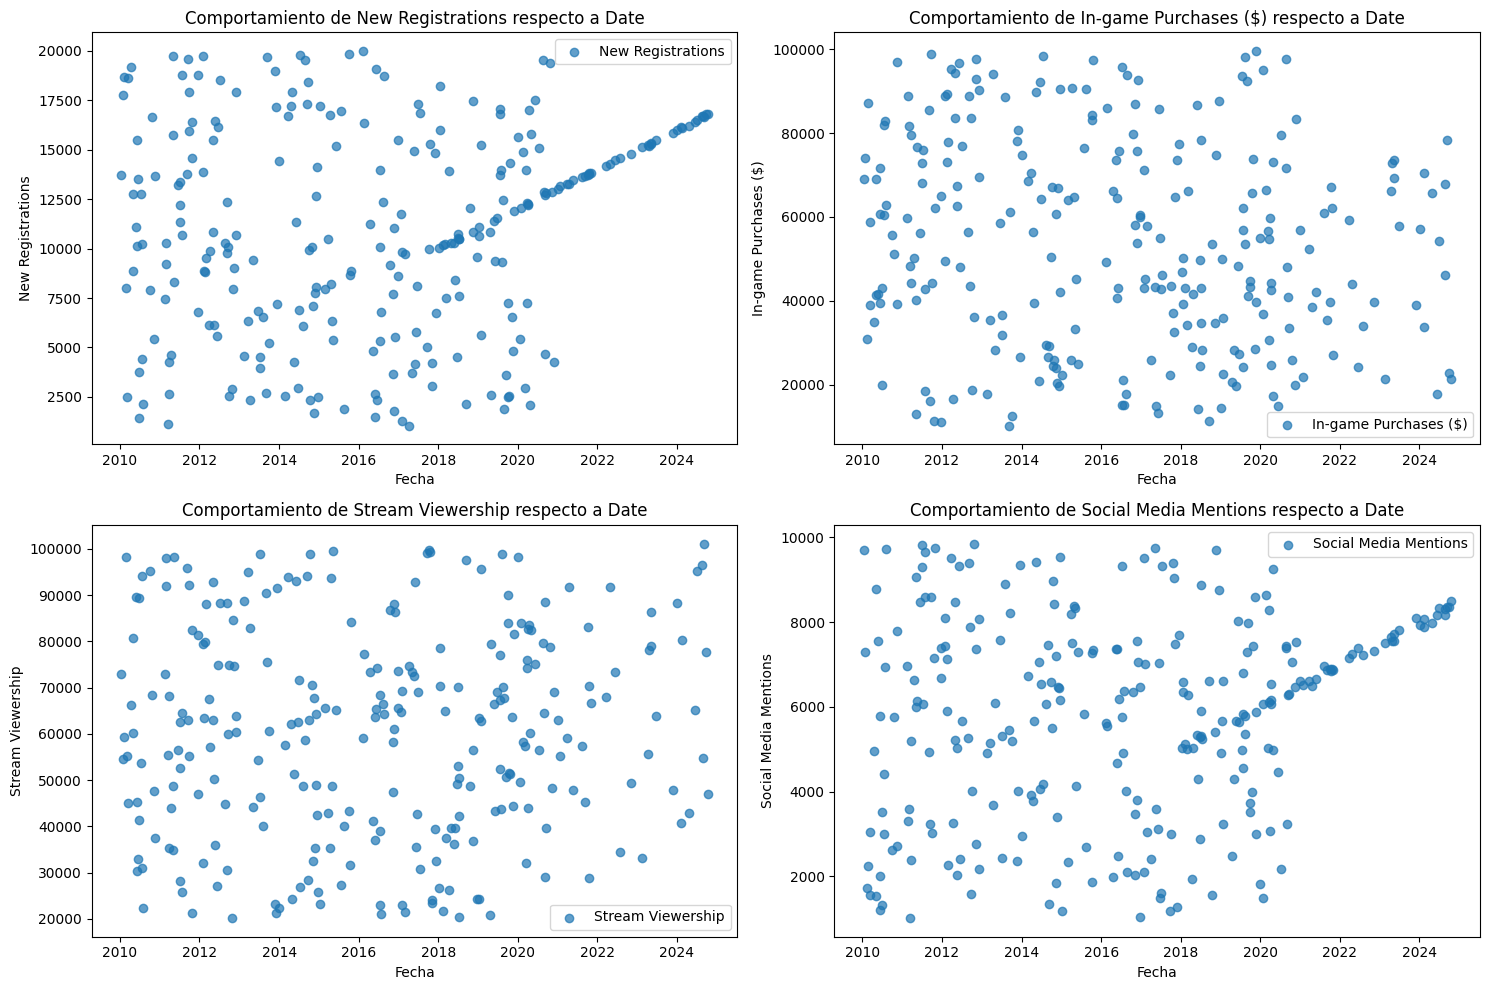

In [79]:
columna_fecha = 'Date'  # Tener en cuenta el tiempo
columnas_a_comparar = ['New Registrations', 'In-game Purchases ($)', 'Stream Viewership', 'Social Media Mentions'] # Columnas que queremos analizar
df_grafico = df[(df['Platform'] == 'Mobile') & 
                 (df['Top Genre'] == 'RPG')] #Filtros (En este caso Mobile RPG)

# Graficar de dos en dos
num_columnas = len(columnas_a_comparar)
fig, axes = plt.subplots(nrows=(num_columnas + 1) // 2, ncols=2, figsize=(15, 5 * ((num_columnas + 1) // 2)))

# Generar los gráficos
for i, columna in enumerate(columnas_a_comparar):
    fila = i // 2
    columna_pos = i % 2
    ax = axes[fila, columna_pos] if num_columnas > 2 else axes[columna_pos]

    # Graficar solo los puntos de la columna con respecto a la fecha
    ax.scatter(df_grafico[columna_fecha], df_grafico[columna], label=columna, alpha=0.7)
    ax.set_title(f'Comportamiento de {columna} respecto a {columna_fecha}')
    ax.set_xlabel('Fecha')
    ax.set_ylabel(columna)
    ax.legend()

# Eliminar ejes vacíos si el número de columnas es impar
if num_columnas % 2 != 0:
    axes[-1, -1].axis('off')

# Ajustar los espacios entre gráficos
plt.tight_layout()
plt.show()


In [80]:
df['Top Genre'].value_counts()

Top Genre
Action        1072
RPG           1004
FPS            985
Simulation     970
Adventure      958
Name: count, dtype: Int64